In [1]:
import pandas as pd
import numpy as np
from utils import reduction_function as rfun
from utils import polarization_function as pfun
import networkx as nx
import csv 
import matplotlib.pyplot as plt

/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
june_df = pd.read_csv("../output_network/stance_df_june.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )
dec_df = pd.read_csv("../output_network/stance_df_december.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )

### Distribution of each topic stance for each month

In [3]:
def plot_c_subplot(df, color_topics, month, n_bins = 30, num_plots = 3):
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)

    for i in range(num_plots):
        topic = color_topics[i]
        axes[i].hist(df[topic], bins = n_bins)
 
        axes[i].set_xlabel('user stance')
        axes[i].set_ylabel('frequency')

        axes[i].set_title(f'Distribution of {topic} in {month}')
 
    plt.tight_layout()
    plt.show()

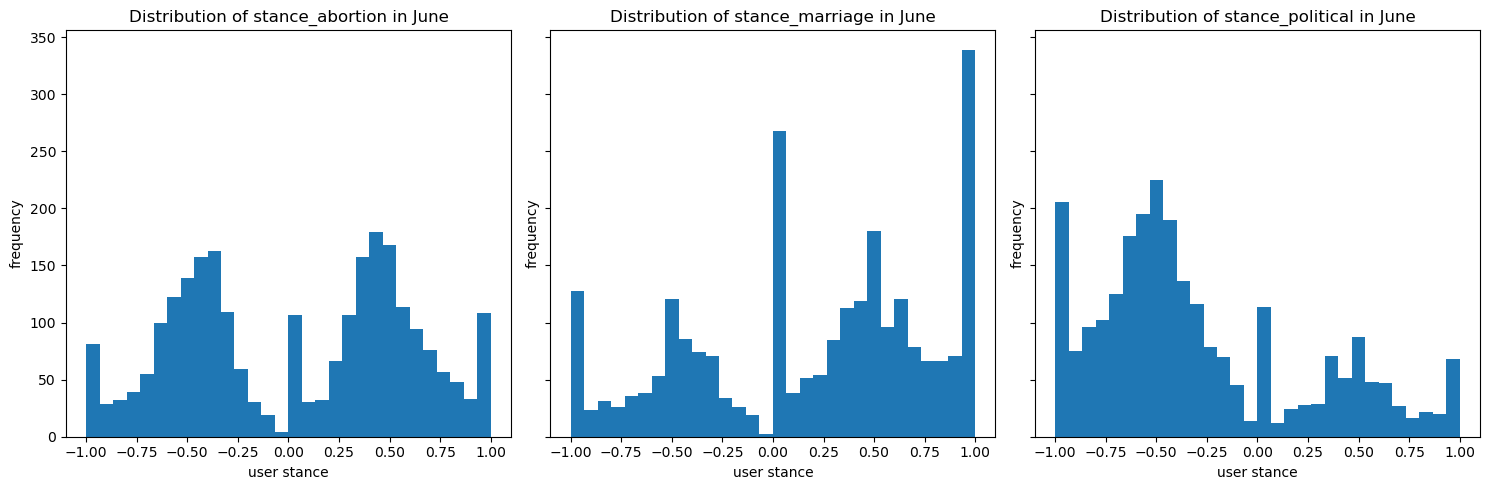

In [16]:
plot_c_subplot(june_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "June")

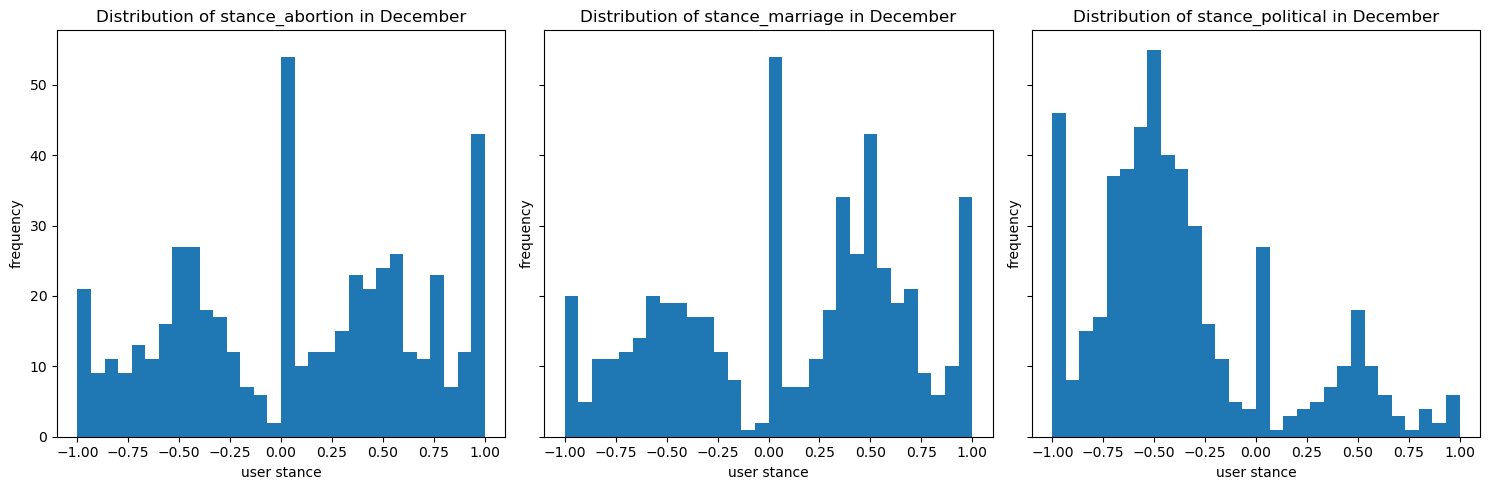

In [17]:
plot_c_subplot(dec_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "December")

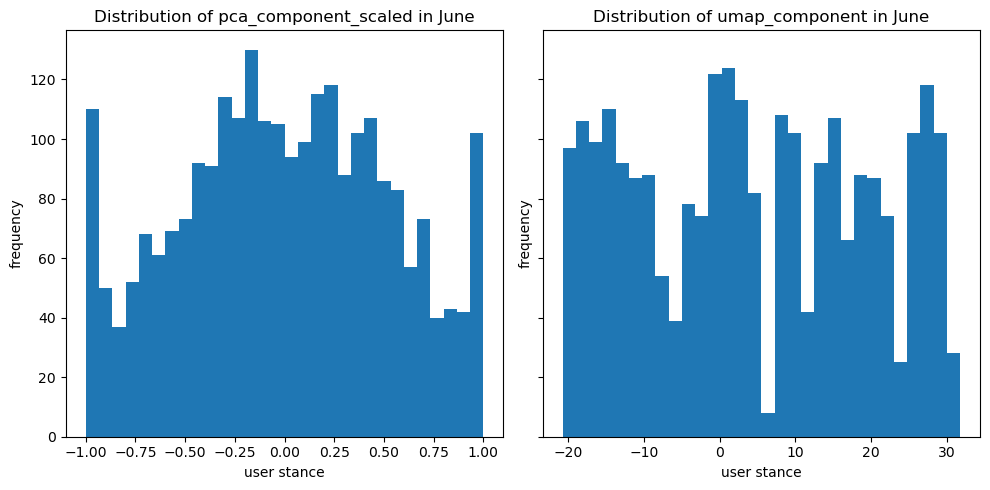

In [18]:
plot_c_subplot(june_df, ["pca_component_scaled", "umap_component"], month = "June", num_plots=2)

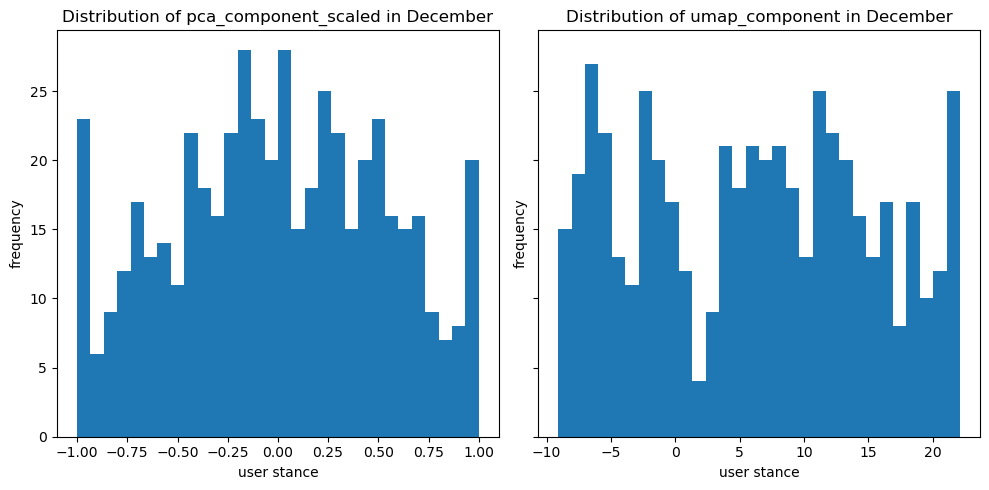

In [19]:
plot_c_subplot(dec_df, ["pca_component_scaled", "umap_component"], month = "December", num_plots=2)

### Same plots, but colored by stance score

Number of bins was set to 30!!

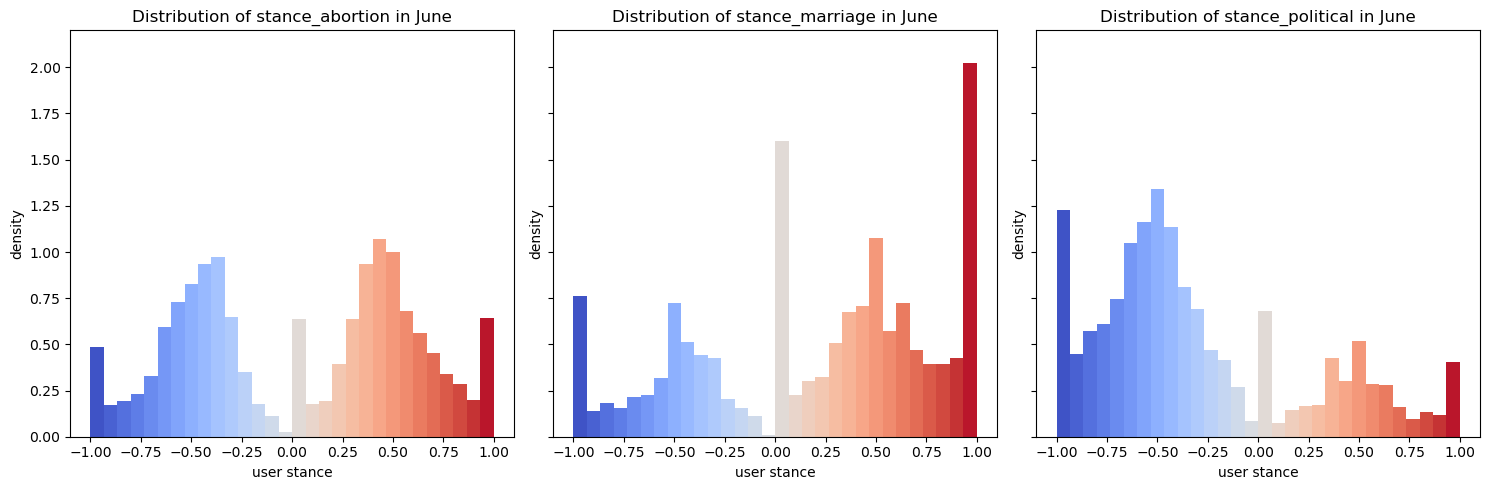

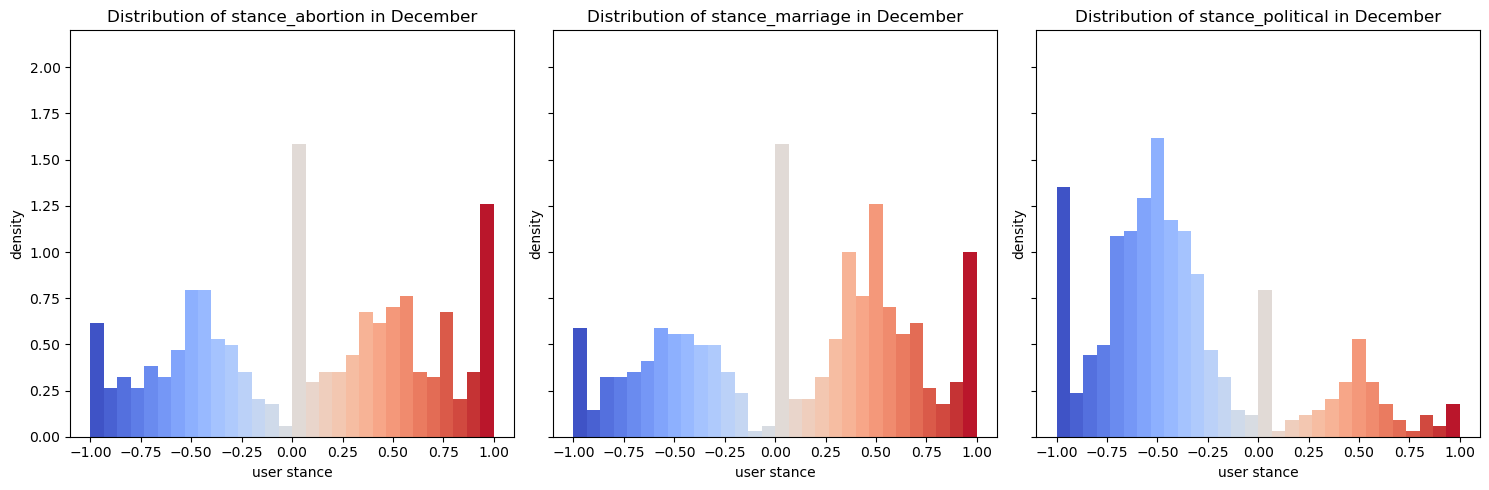

In [150]:
import matplotlib.pyplot as plt
import numpy as np

def plot_c_subplot_colored(df, color_topics, month, n_bins=30, num_plots=3, y_lim = 2.2):
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)
    if num_plots == 1:
        axes = [axes]

    for i in range(num_plots):
        topic = color_topics[i]
        
        # Calculate the histogram values
        n, bins, patches = axes[i].hist(df[topic], bins=n_bins, range=(-1, 1), density = True)

        # Normalize the values to the range [-1, 1]
        norm = plt.Normalize(vmin=-1, vmax=1)

        # Create a colormap (from blue to red)
        cmap = plt.get_cmap('coolwarm')

        # Color each bar based on its value
        for patch, bin_edge in zip(patches, bins[:-1]):  # Iterate through bins
            # Calculate the midpoint of the bin (this will determine the color)
            bin_center = (bin_edge + bins[np.where(bins == bin_edge)[0][0] + 1]) / 2
            color = cmap(norm(bin_center))  # Normalize and apply the colormap
            patch.set_facecolor(color)  # Set color of the bar

        # Set labels and titles
        axes[i].set_xlabel('user stance')
        axes[i].set_ylabel('density')
        axes[i].set_ylim(0, y_lim)
        axes[i].set_title(f'Distribution of {topic} in {month}')
    
    plt.tight_layout()
    plt.show()
    
plot_c_subplot_colored(june_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "June")
plot_c_subplot_colored(dec_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "December")


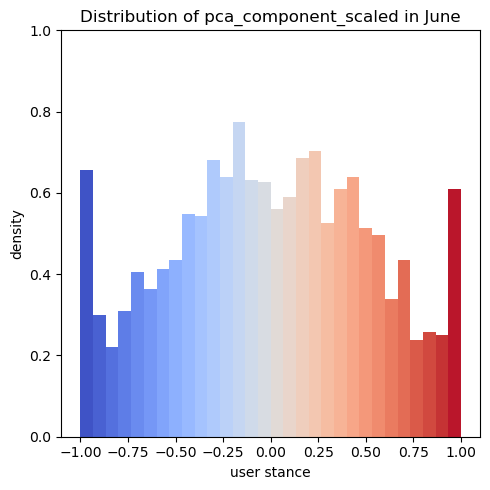

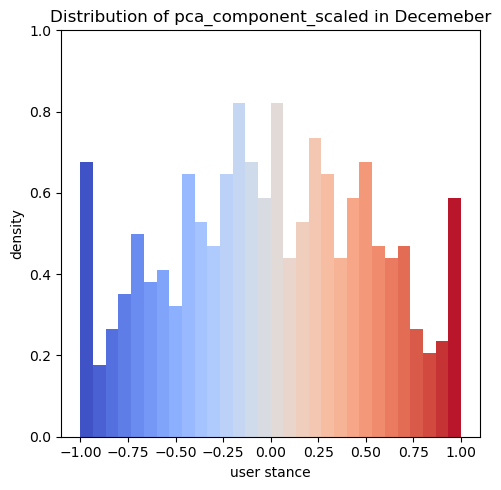

In [151]:
plot_c_subplot_colored(june_df, ["pca_component_scaled"], month = "June", num_plots=1, y_lim = 1)
plot_c_subplot_colored(dec_df, ["pca_component_scaled"], month = "Decemeber", num_plots=1, y_lim = 1)

### Networks colored by scaled principal component  

In [9]:
june_df.columns

Index(['Unnamed: 0', 'user', 'A_x', 'F_x', 'N_x', 'stance_abortion', 'A_y',
       'F_y', 'N_y', 'stance_marriage', 'A', 'F', 'N', 'stance_political',
       'stance_political_scaled', 'stance_abortion_scaled',
       'stance_marriage_scaled', 'pca_component', 'umap_component', 'nodeid',
       'pca_component_scaled', 'pca_component1', 'pca_component2',
       'umap_component1', 'umap_component2', 'pca1_scaled', 'pca2_scaled'],
      dtype='object')

In [157]:
attr_dict_june = june_df.set_index('nodeid')[['stance_marriage', 'stance_political', 'stance_abortion', "pca_component_scaled", "umap_component"]].to_dict(orient='index')
attr_dict_dec = dec_df.set_index('nodeid')[['stance_marriage', 'stance_political', 'stance_abortion', "pca_component_scaled", "umap_component"]].to_dict(orient='index')

In [11]:
# june_dict = june_df.set_index('nodeid')['pca_component_scaled'].to_dict()
# dec_dict  = dec_df.set_index('nodeid')['pca_component_scaled'].to_dict()

In [158]:
net_file = pd.read_csv("../output_network/network_filtered_june.csv", sep="\t")
G_june = nx.from_pandas_edgelist(net_file, "src", "trg")
print(G_june)

Graph with 2514 nodes and 23700 edges


In [159]:
net_file = pd.read_csv("../output_network/network_filtered.csv", sep="\t")
G_dec = nx.from_pandas_edgelist(net_file, "src", "trg")
print(G_dec)

Graph with 511 nodes and 2785 edges


In [160]:
# setting the attributes 
nx.set_node_attributes(G_june, attr_dict_june)
nx.set_node_attributes(G_dec, attr_dict_dec)
print(G_june.nodes[911729]['pca_component_scaled'])
print(G_dec.nodes[1232857]['pca_component_scaled'])

-0.3719542900291201
0.053076728245611


In [161]:
# checks 
print(june_df[june_df["nodeid"] == 911729]["pca_component_scaled"])
print(dec_df[dec_df["nodeid"] == 1232857]["pca_component_scaled"])

0   -0.371954
Name: pca_component_scaled, dtype: float64
0    0.053077
Name: pca_component_scaled, dtype: float64


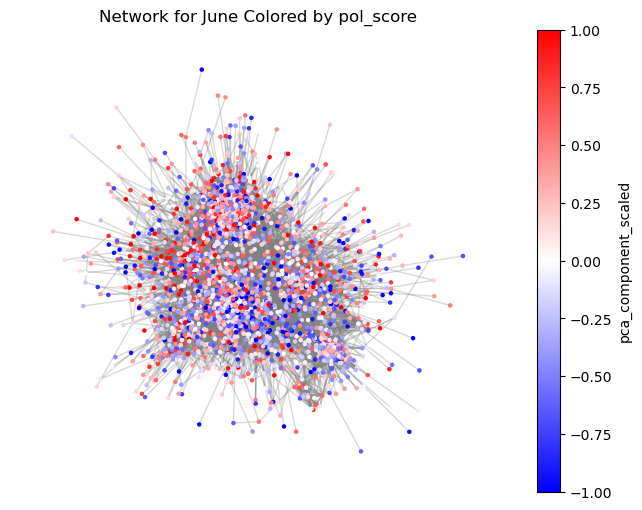

In [15]:
from matplotlib.cm import ScalarMappable

# Get the pol_score values for all nodes (default to 0 if missing)
values = [G_june.nodes[n].get("pca_component_scaled", 0) for n in G_june.nodes]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot
pos = nx.spring_layout(G_june, seed=42)  # Or any other layout
nx.draw(
    G_june, pos,
    node_color=values,
    cmap=plt.cm.bwr,   # Red-white-blue colormap (seismic, bwr, coolwarm)
    edge_color=(0.5, 0.5, 0.5, 0.3), 
    node_size=5,
    ax = ax
)

sm = ScalarMappable(cmap=plt.cm.bwr)
sm.set_array(values)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("pca_component_scaled")
plt.title("Network for June Colored by pol_score")
plt.show()

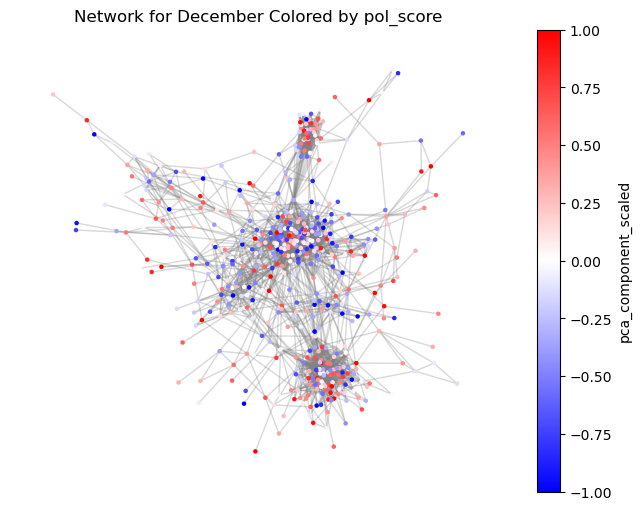

In [16]:
from matplotlib.cm import ScalarMappable

# Get the pol_score values for all nodes (default to 0 if missing)
values = [G_dec.nodes[n].get("pca_component_scaled", 0) for n in G_dec.nodes]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot
pos = nx.spring_layout(G_dec, seed=42)  # Or any other layout
nx.draw(
    G_dec, pos,
    node_color=values,
    cmap=plt.cm.bwr,   # Red-white-blue colormap
    edge_color=(0.5, 0.5, 0.5, 0.3), #sets edge color to gray by first 3 numbers (RGB) and the 4th number is the opacity from 0 (transparent) to 1 (opaque)
    node_size=5,
    ax = ax
)

sm = ScalarMappable(cmap=plt.cm.bwr)
sm.set_array(values)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("pca_component_scaled")
plt.title("Network for December Colored by pol_score")
plt.show()

In [162]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.cm import ScalarMappable

def plot_graph_colored_by_attributes(G, attributes, cmap=plt.cm.bwr, num_plots = 3):
    """
    Plots the same graph in 3 subplots colored by different node attributes.

    Parameters:
    - G: NetworkX graph
    - attributes: List of 3 node attribute names to color by
    - cmap: Colormap (default: bwr)
    """

    fig, axes = plt.subplots(1, num_plots, figsize=(18, 6), constrained_layout=True)
    pos = nx.spring_layout(G, seed=42)

    for i, attr in enumerate(attributes):
        values = [G.nodes[n].get(attr, 0) for n in G.nodes]
        ax = axes[i]

        nx.draw(
            G, pos,
            node_color=values,
            cmap=cmap,
            edge_color=(0.5, 0.5, 0.5, 0.3),
            node_size=5,
            ax=ax
        )

        sm = ScalarMappable(cmap=cmap)
        sm.set_array(values)
        cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
        cbar.set_label(attr)

        ax.set_title(f"Colored by {attr}")
        ax.axis("off")

    plt.suptitle("Network Colored by Different Node Attributes", fontsize=16)
    plt.show()

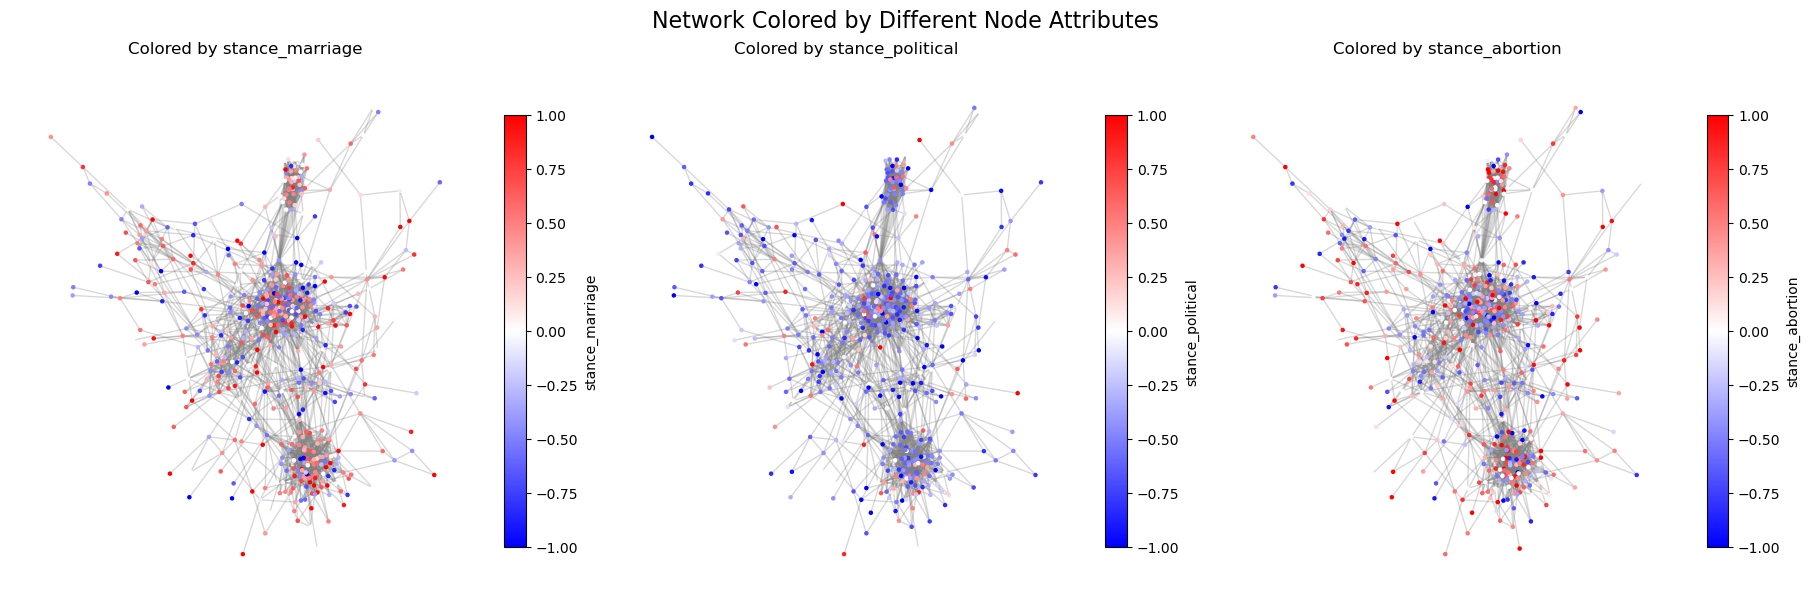

In [163]:
plot_graph_colored_by_attributes(G_dec, ['stance_marriage', 'stance_political', 'stance_abortion']) 

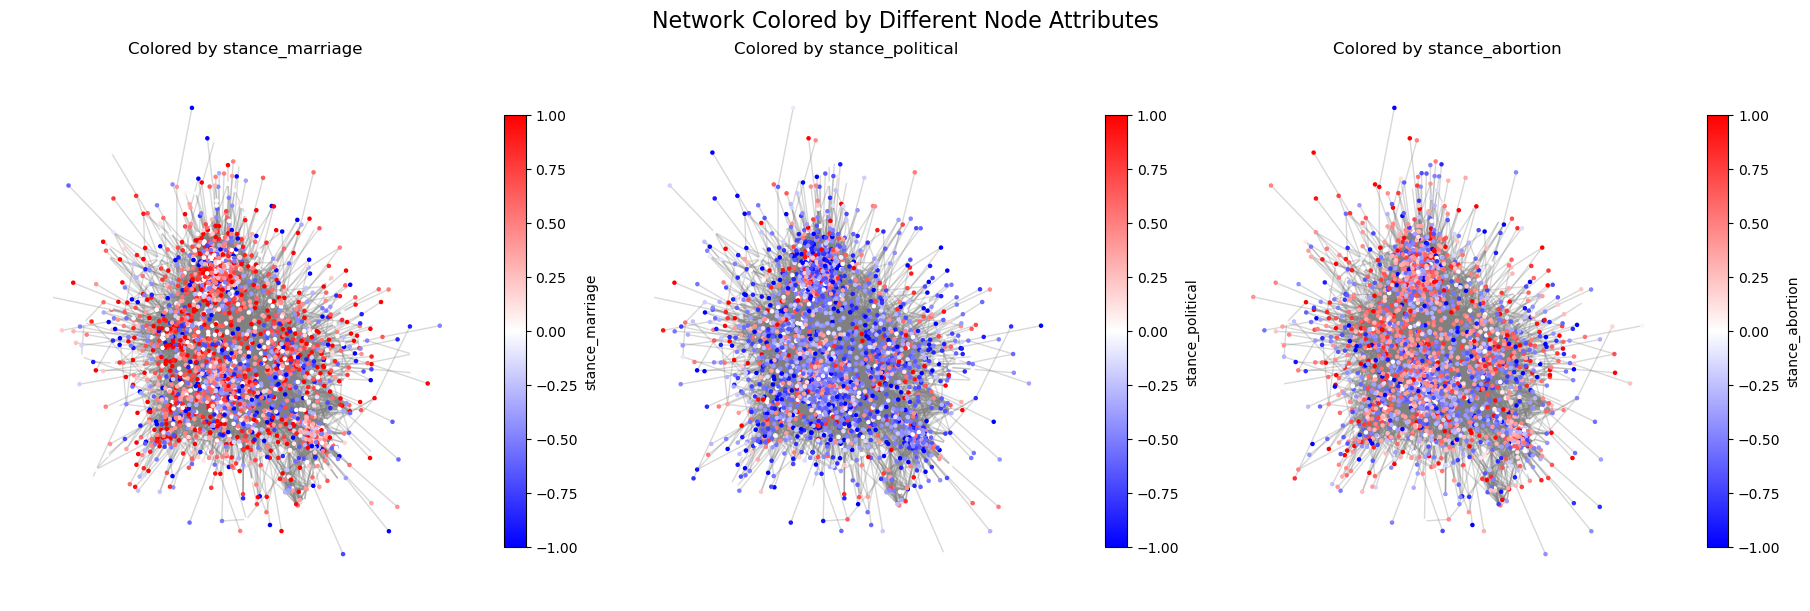

In [156]:
plot_graph_colored_by_attributes(G_june, ['stance_marriage', 'stance_political', 'stance_abortion']) 

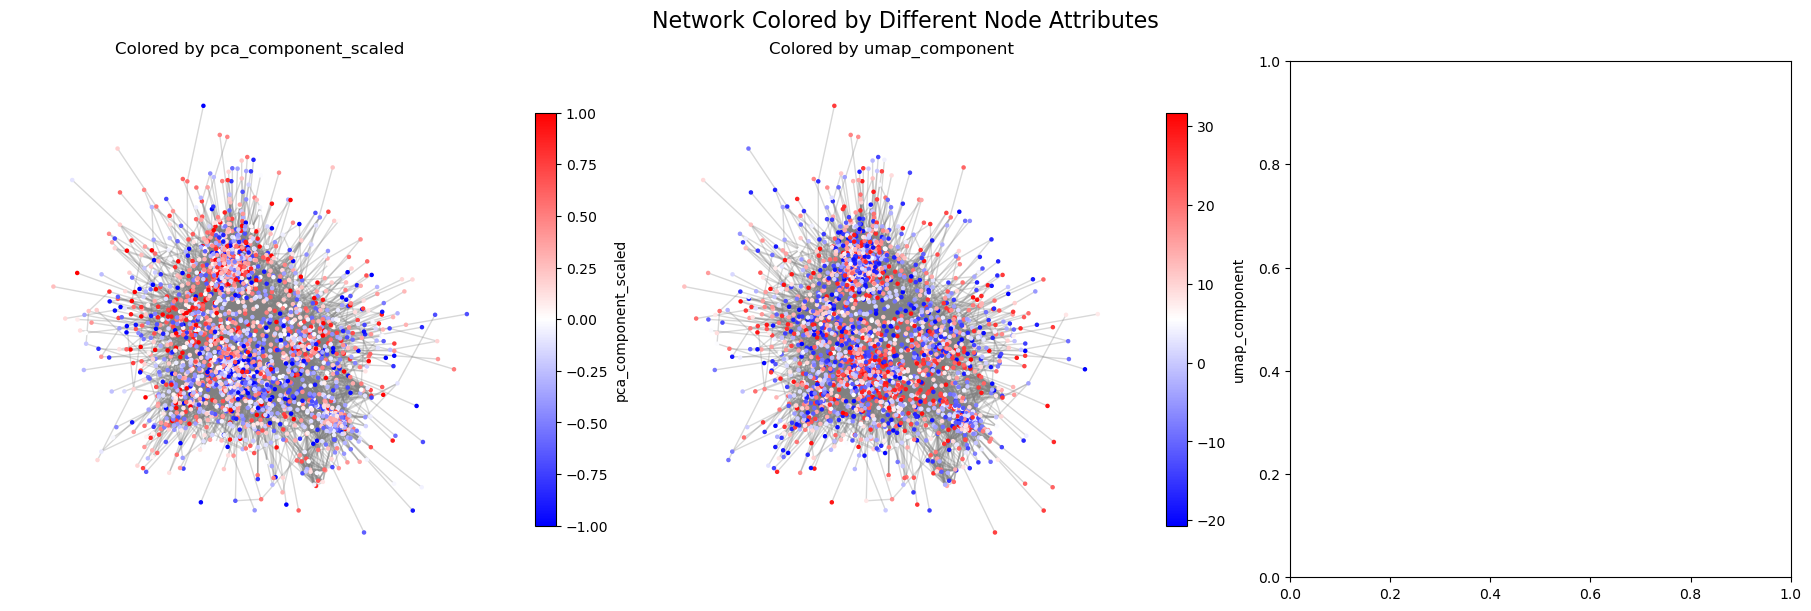

In [164]:
plot_graph_colored_by_attributes(G_june, ['pca_component_scaled', 'umap_component']) 

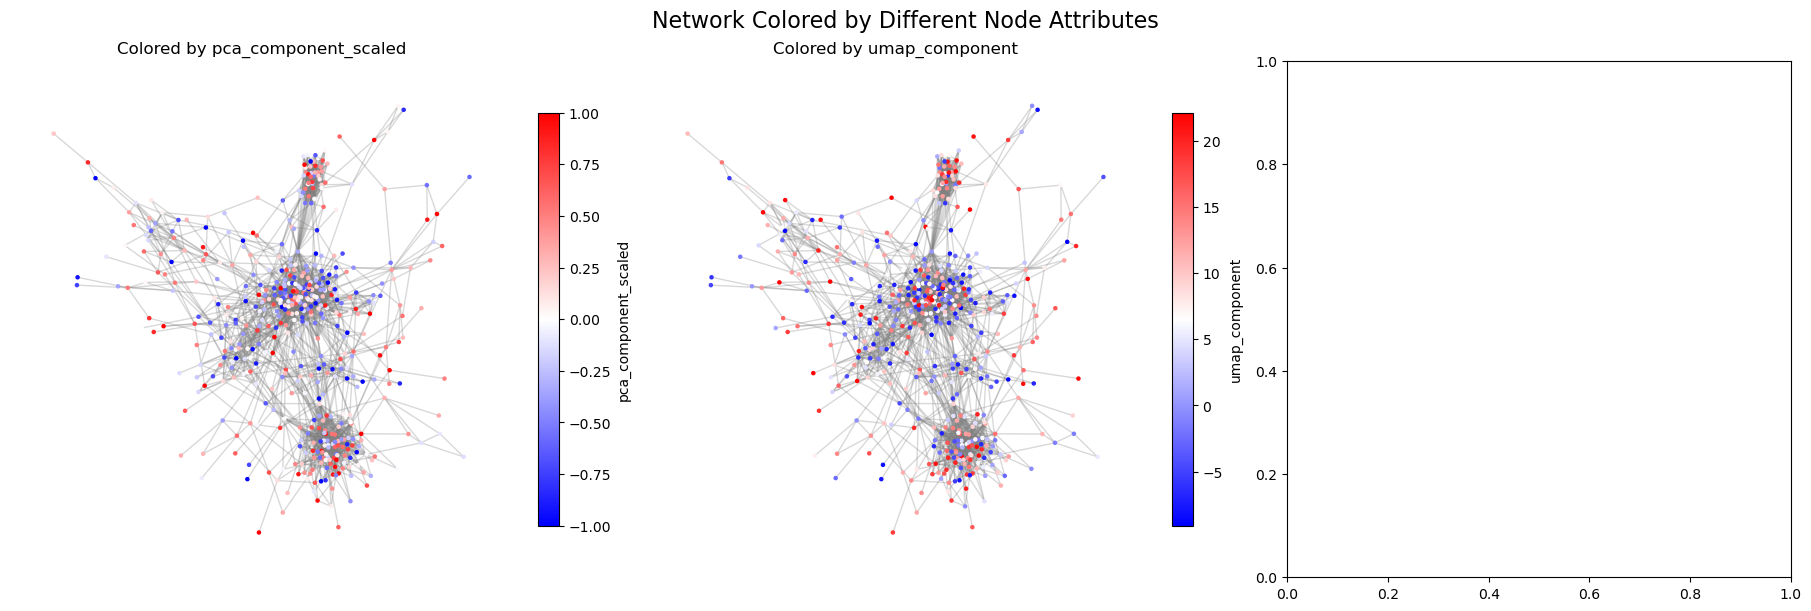

In [165]:
plot_graph_colored_by_attributes(G_dec, ['pca_component_scaled', 'umap_component']) 

##### Homophily

In [17]:
print("Homophily pca:", nx.attribute_assortativity_coefficient(G_june, "pca_component_scaled", nodes=None), "\n")
print("Homophily abortion", nx.attribute_assortativity_coefficient(G_june, "stance_abortion", nodes=None), "\n")
print("Homophily marriage", nx.attribute_assortativity_coefficient(G_june, "stance_marriage", nodes=None), "\n")
print("Homophily political", nx.attribute_assortativity_coefficient(G_june, "stance_political", nodes=None), "\n")

Homophily pca: -0.0005867298433456265 

Homophily abortion -0.0006921594058191086 

Homophily marriage 0.0012592533664777291 

Homophily political -0.0009505493654566606 



In [18]:
print("Homophily pca:", nx.attribute_assortativity_coefficient(G_dec, "pca_component_scaled", nodes=None), "\n")
print("Homophily abortion", nx.attribute_assortativity_coefficient(G_dec, "stance_abortion", nodes=None), "\n")
print("Homophily marriage", nx.attribute_assortativity_coefficient(G_dec, "stance_marriage", nodes=None), "\n")
print("Homophily political", nx.attribute_assortativity_coefficient(G_dec, "stance_political", nodes=None), "\n")

Homophily pca: -0.004074110584887919 

Homophily abortion 0.003352604252867144 

Homophily marriage -0.0037899652115279585 

Homophily political -0.003494531298083399 



## Network analysis

- number of nodes, edges
- average degree
- max, min degree
- degree distributions??
- clustering coefficient

In [23]:
print(f"June {G_june} \n December {G_dec}")

June Graph with 2514 nodes and 23700 edges 
 December Graph with 511 nodes and 2785 edges


In [24]:
#Average degree
avg_degreeJ = sum(dict(G_june.degree()).values()) / G_june.number_of_nodes()
avg_degreeD = sum(dict(G_dec.degree()).values()) / G_dec.number_of_nodes()

print("Average degree June:", avg_degreeJ)
print("Average degree December:", avg_degreeD)

Average degree June: 18.85441527446301
Average degree December: 10.900195694716242


In [25]:
#Max and min degrees
print(f"Max degree June: {max(dict(G_june.degree()).values())}, Min degree: {min(dict(G_june.degree()).values())}")
print(f"Max degree Dec: {max(dict(G_dec.degree()).values())}, Min degree: {min(dict(G_june.degree()).values())}")

Max degree June: 161, Min degree: 1
Max degree Dec: 50, Min degree: 1


In [35]:
#Betweenness centrality
print("Betweenness centrality June: ", np.mean(list(nx.betweenness_centrality(G_june).values())))
print("Betweenness centrality December: ", np.mean(list(nx.betweenness_centrality(G_dec).values())))

Betweenness centrality June:  0.0010281598192880695
Betweenness centrality December:  0.005314537473627124


In [28]:
print(f"Average clustering for June graph: {nx.average_clustering(G_june)}")
print(f"Average clustering for December graph: {nx.average_clustering(G_dec)}")

Average clustering for June graph: 0.14912865628041622
Average clustering for December graph: 0.24321261067025826


### Anlysis of the data 

##### Comparing standard deviation between months: 


December has a slightly lower standard deviation in 3/4 columns -> could mean that opinions are slightly more moderate/similar 
- Might be too little difference to say anything concrete though

In [ ]:
np.std(june_df["pca_component_scaled"]), np.std(dec_df["pca_component_scaled"])


(np.float64(0.5276185759763007), np.float64(0.5275708930472016))

In [4]:
np.std(june_df["stance_abortion"]), np.std(dec_df["stance_abortion"])


(np.float64(0.5547492065586641), np.float64(0.5863709776497606))

In [ ]:
np.std(june_df["stance_marriage"]), np.std(dec_df["stance_marriage"])

(np.float64(0.5960448004910552), np.float64(0.5680417127368909))

In [6]:
np.std(june_df["stance_political"]), np.std(dec_df["stance_political"])

(np.float64(0.5244130985484288), np.float64(0.4613735999300244))

##### Opinion distribution shape

In [147]:
from scipy.stats import kurtosis, skew
pca_scores_june = nx.get_node_attributes(G_june, "pca_component_scaled").values()
pca_scores_dec = nx.get_node_attributes(G_dec, "pca_component_scaled").values()

scores_june = np.array(list(pca_scores_june))
scores_dec = np.array(list(pca_scores_dec))

print("June std:", scores_june.std())
print("June kurtosis:", kurtosis(scores_june))
print("June skew:", skew(scores_june))

print("Dec std:", scores_dec.std())
print("Dec kurtosis:", kurtosis(scores_dec))
print("Dec skew:", skew(scores_dec))

June std: 0.5276185759763007
June kurtosis: -0.8062984013065089
June skew: -0.02594121878347977
Dec std: 0.5275708930472016
Dec kurtosis: -0.8458319736186692
Dec skew: -0.03613449150303956


##### Average opinion difference across endges 

In [13]:
# june 
import numpy as np

opinion_diff = []
for u, v in G_june.edges():
    diff = abs(G_june.nodes[u]['pca_component_scaled'] - G_june.nodes[v]['pca_component_scaled'])
    opinion_diff.append(diff)

mean_diff = np.mean(opinion_diff)
print(f"Average opinion difference across edges: {mean_diff:.3f}")

Average opinion difference across edges: 0.568


In [14]:
# dec 
import numpy as np

opinion_diff = []
for u, v in G_dec.edges():
    diff = abs(G_dec.nodes[u]['pca_component_scaled'] - G_dec.nodes[v]['pca_component_scaled'])
    opinion_diff.append(diff)

mean_diff = np.mean(opinion_diff)
print(f"Average opinion difference across edges: {mean_diff:.3f}")

Average opinion difference across edges: 0.604


##### Network centrality of extreme opinions 


In [ ]:
pca_scores = nx.get_node_attributes(G_dec, "pca_component_scaled")
extremes = {node: score for (node, score) in pca_scores.items() if np.abs(score) > 0.8 }

73

In [83]:
centralities = nx.degree_centrality(G_dec)


In [ ]:
centralities = {node: centrality for node, centrality in centralities.items() if node in extremes}

73

In [116]:
pca_scores = nx.get_node_attributes(G_dec, "pca_component_scaled")
pca_scores

{798787: -0.1139617572082115,
 254684: -0.596345983177834,
 15548: 0.5228313725746613,
 430231: 0.1054142756364723,
 1209510: 0.2338590759816162,
 410689: -0.2691074612232002,
 695649: -0.010020232196979,
 419460: 0.395423978544367,
 1234244: 0.5219067570577762,
 520690: -0.044488276263954,
 972375: 0.203316697525746,
 521147: -0.1504114204978992,
 357231: 0.5275939821450382,
 706029: 0.0782130747862536,
 608682: -0.2312552501628725,
 1195573: 0.8336229395990129,
 494890: -0.5342154813723496,
 146354: -0.0034735250186879,
 1032836: 0.9837645822067744,
 1132377: 0.4807799276470512,
 1137789: 0.4146024017253428,
 748633: 0.7296466821709806,
 21729: 0.0654377601884905,
 1220350: 0.785410146437157,
 1035996: -0.1983113432721082,
 305666: 0.5105026171408449,
 1230484: -0.020591931354448,
 1153602: -0.589948810956636,
 1232506: 0.9128115825461736,
 1224593: -0.5372039584966967,
 565896: 0.5885927144591929,
 747924: 0.1666533701309363,
 126762: 0.3890994859938841,
 164809: -0.2844861166281011

In [142]:
def get_centrality(network, column, threshold): 
    pca_scores = nx.get_node_attributes(network, column)
    extremes = {node: np.abs(score) for (node, score) in pca_scores.items() if np.abs(score) > threshold }
    centralities = nx.betweenness_centrality(network)
    extreme_centralities = {node: centrality for node, centrality in centralities.items() if node in extremes}
    extreme_centrality = np.mean(list(extreme_centralities.values()))
    return extreme_centrality

In [141]:
get_centrality(G_dec, "pca_component_scaled", 0.6) 

{1195573: np.float64(0.8336229395990129), 1032836: np.float64(0.9837645822067744), 748633: np.float64(0.7296466821709806), 1220350: np.float64(0.785410146437157), 1232506: np.float64(0.9128115825461736), 787767: np.float64(1.0), 377344: np.float64(0.6101881065379373), 1137978: np.float64(0.6885329096228237), 1147333: np.float64(0.7686895381181382), 1170058: np.float64(0.641548368157776), 871004: np.float64(0.889067302726201), 909695: np.float64(0.6441233152090878), 1211908: np.float64(0.6882511371027225), 1204545: np.float64(0.9539207475365374), 1214536: np.float64(0.8305115079111699), 1225587: np.float64(0.6124039926207612), 1190564: np.float64(0.7304492686638081), 1213020: np.float64(0.9203098897705608), 1024416: np.float64(0.9015742168427568), 1190023: np.float64(0.6192857211762122), 1051525: np.float64(0.948333432826406), 190029: np.float64(1.0), 198633: np.float64(0.6955255634245554), 1014902: np.float64(0.6725550238829866), 1080155: np.float64(0.6651104767483241), 1090658: np.flo

np.float64(0.004571270363149079)

In [140]:
get_centrality(G_june, "pca_component_scaled", 0.6)

{897056: np.float64(0.8289854281345584), 76942: np.float64(0.9842297230219896), 588398: np.float64(0.9839599912275028), 443464: np.float64(0.977816580229861), 334551: np.float64(0.6217753265347685), 1001160: np.float64(0.7003926912622982), 1133563: np.float64(0.7068292582532806), 1142489: np.float64(0.7002202847424821), 869197: np.float64(0.772381406333016), 1089779: np.float64(0.7603715892024792), 682464: np.float64(0.7133143071884365), 34212: np.float64(0.6529799994680209), 354696: np.float64(0.8037504340369248), 188205: np.float64(0.8032560569057401), 955769: np.float64(0.6299265690321156), 931750: np.float64(0.6729479077788117), 1150033: np.float64(0.6617850089152855), 94806: np.float64(0.6120704767037752), 1131709: np.float64(0.6904949593609335), 682351: np.float64(0.7733018407792014), 666051: np.float64(0.6420658561367376), 1120401: np.float64(0.6489621922632203), 844206: np.float64(0.790741350411089), 825942: np.float64(0.725385414965396), 1144240: np.float64(0.6725400006611801)

np.float64(0.0009707914170776992)

In [134]:
def line_plot(network, column):
    pca_scores = nx.get_node_attributes(network, column).values()
    centrality = list(nx.betweenness_centrality(network).values())

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_scores, centrality, alpha=0.6)
    plt.xlabel('Opinion Extremeness (|PCA score|)')
    plt.ylabel('Betweenness Centrality')
    plt.title('Betweenness vs Centrality')
    plt.show()

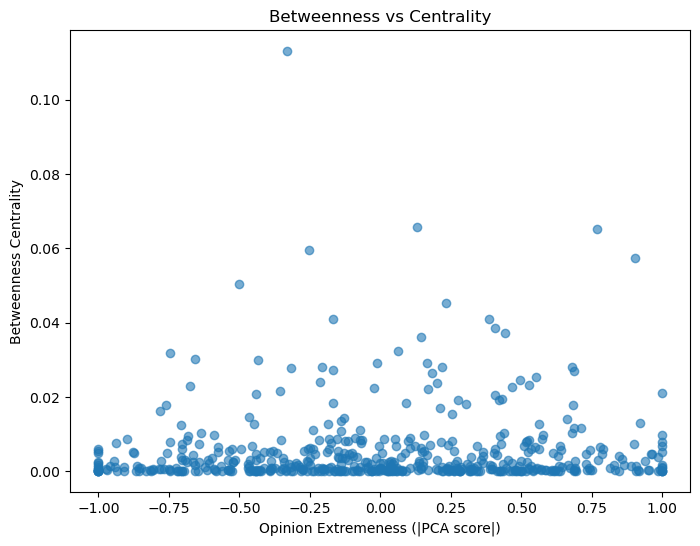

In [135]:
line_plot(G_dec, "pca_component_scaled")

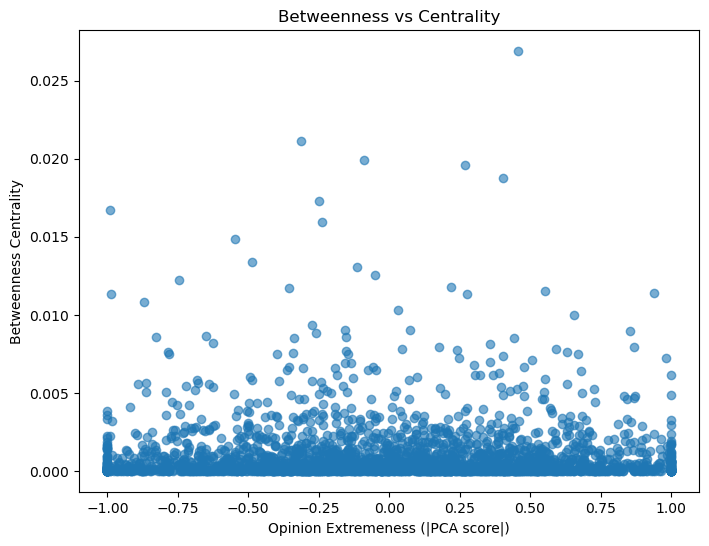

In [136]:
line_plot(G_june, "pca_component_scaled")

In [60]:
def box_plot(network):
    data = pd.DataFrame({
    'extremeness': nx.get_node_attributes(network, "pca_component_scaled").values(),
    'centrality': list(nx.degree_centrality(network).values())
})
    data['bin'] = pd.cut(data['extremeness'], bins=np.linspace(0, 1, 6))

    data.boxplot(column='centrality', by='bin', grid=False)
    plt.title('Centrality by Opinion Extremeness')
    plt.suptitle('')
    plt.xlabel('Opinion Extremeness Bin')
    plt.ylabel('Degree Centrality')
    plt.show()

##### Community detection

In [173]:
import community.community_louvain as community_louvain
import networkx as nx
import numpy as np

# Run community detection
partition = community_louvain.best_partition(G_june)

# Attach opinions
opinions = nx.get_node_attributes(G_june, 'pca_component_scaled')

# Group by community and measure opinion spread
from collections import defaultdict

community_opinions = defaultdict(list)
for node, comm_id in partition.items():
    if node in opinions:
        community_opinions[comm_id].append(opinions[node])

# Compute variance per community
variances = {comm: np.var(scores) for comm, scores in community_opinions.items()}
avg_variance = np.mean(list(variances.values()))
avg_variance

np.float64(0.2633885524302773)

In [171]:
# Run community detection
partition = community_louvain.best_partition(G_dec)

# Attach opinions
opinions = nx.get_node_attributes(G_dec, 'pca_component_scaled')

# Group by community and measure opinion spread
from collections import defaultdict

community_opinions = defaultdict(list)
for node, comm_id in partition.items():
    if node in opinions:
        community_opinions[comm_id].append(opinions[node])

# Compute variance per community
variances = {comm: np.var(scores) for comm, scores in community_opinions.items()}
avg_variance = np.mean(list(variances.values()))
avg_variance

np.float64(0.22096437874093108)